## LINEAR REGRESSION ASSIGNMENT

#### Importing and Understanding Data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

# importing scikit learn 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
# RFE and Linear Regression modules
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# importing R2 score from scikit learn
from sklearn.metrics import r2_score

#importing statsmodels 
import statsmodels.api as sm
# importing VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing bike sharing data set
bike_sharing = pd.read_csv('day.csv')

In [4]:
# Displays the first few rows of the dataframes
bike_sharing.head(5) 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_sharing.shape # Checking the nos. of rows and columns 

(730, 16)

In [6]:
bike_sharing.info() # Checking dataframe general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_sharing.describe() # Statistical details of continuous variable

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike_sharing.isnull().sum() # Checking for any null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Data Preparation

- Dropping 'instant' column as it just indicate the index will not be of any use
- Dropping 'dteday' column as we have month and year column already existing.
- Dropping 'casual' and 'registered' to avoid data leakage

In [9]:
drop_vars = ['instant','dteday','casual','registered']
bike_sharing = bike_sharing.drop(drop_vars, axis=1)

#### Converting season, weather, weekday and month to string variables

In [10]:
season_dict = {1:'spring',2:'summer',3:'fall', 4:'winter'}
weathersit_dict = {1:'clear', 2:'mist', 3:'Light rain',4:'Heavy Rain'}

In [11]:
# mapping above declared season dictionary to the season's column in the dataframe 
bike_sharing['season']=bike_sharing['season'].apply(lambda x:season_dict.get(x))

In [12]:
# mapping above declared weather dictionary to the weathersit's column in the dataframe 
bike_sharing['weathersit']=bike_sharing['weathersit'].apply(lambda x:weathersit_dict.get(x))

In [13]:
# converting months to month names
bike_sharing['mnth'] = pd.to_datetime(bike_sharing['mnth'], format='%m').dt.month_name().str.slice(stop=3)

In [14]:
# converting weekday to week day names (As 01-01-2018 was Monday,so considering 6 as Monday and 0 as Tuesday and so on)
days = {0:'Tues',1:'Weds',2:'Thurs',3:'Fri',4:'Sat',5:'Sun',6:'Mon'}
bike_sharing['weekday'] = bike_sharing['weekday'].apply(lambda x: days[x])

In [15]:
bike_sharing.head(5) # Displays the dataframe after converting few columns to strings type.

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Weds,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
bike_sharing.shape # Displays the size of dataframe

(730, 12)

<AxesSubplot:>

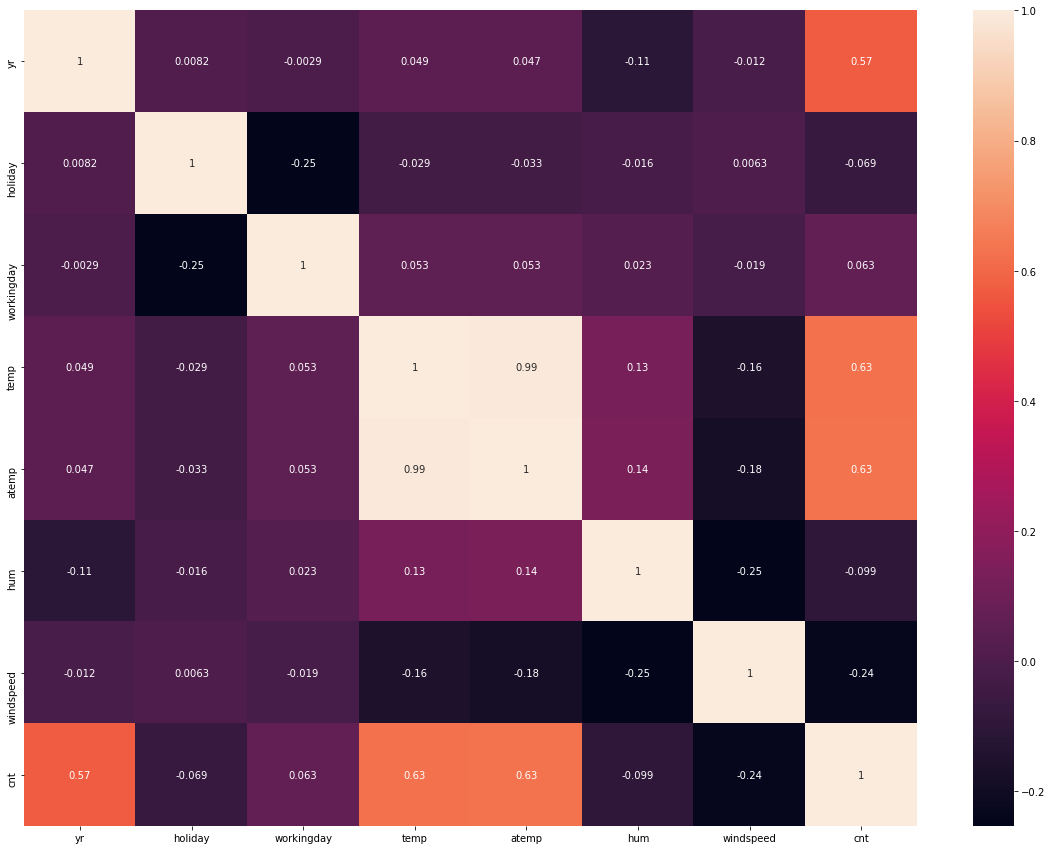

In [17]:
# Plotting the correlation plot 
plt.figure(figsize =(20,15))
sns.heatmap(data = bike_sharing.corr(), annot =True)

In [18]:
# Dropping highly correlated columns to avoid multicollinearity
bike_sharing = bike_sharing.drop(['atemp'],axis =1) # temp is highly correlated to atemp

In [19]:
bike_sharing.columns # Displays the names of the column in the dataframe after checking the correlation

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

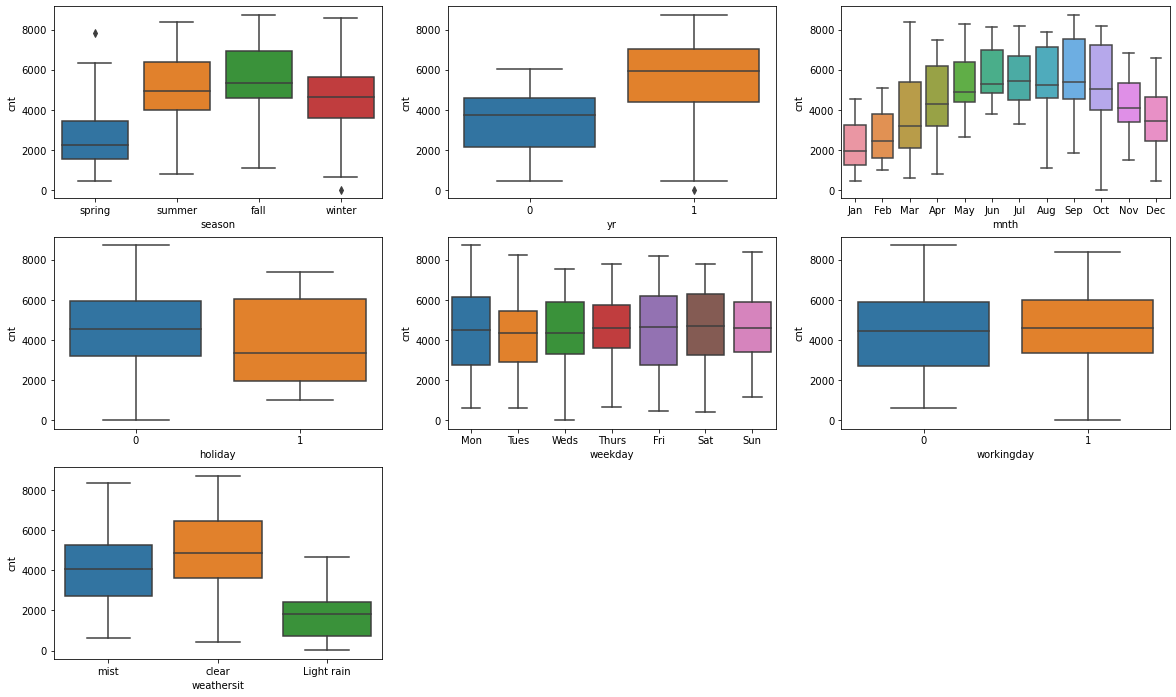

In [20]:
#visualising categorical variables
cat_var=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
plt.figure(figsize = (20,12))
for i in range(len(cat_var)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=cat_var[i], y='cnt',data = bike_sharing)

In [21]:
# sub sampling the numerical variables from the main dataframe
num_vars = ['temp', 'hum', 'windspeed','cnt']
bike_sharing_num = bike_sharing[num_vars]

<Figure size 720x576 with 0 Axes>

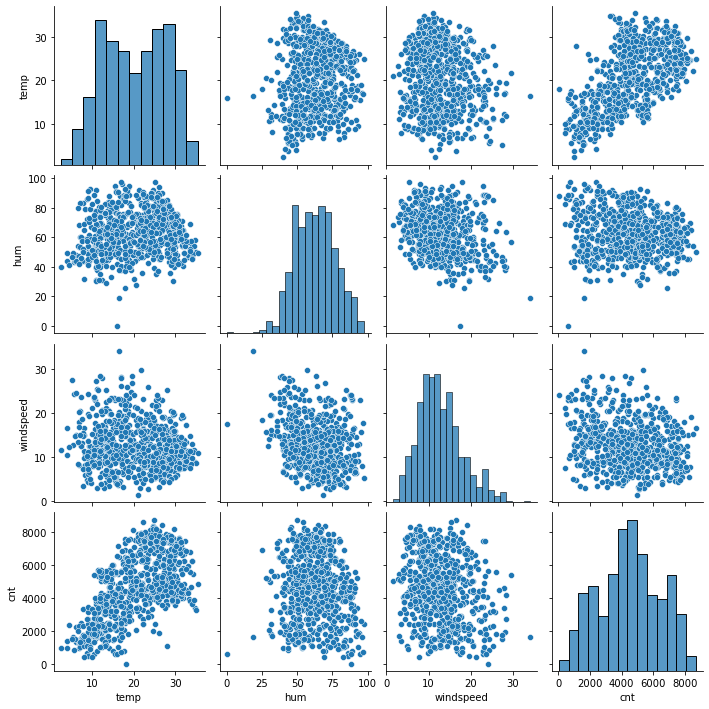

In [22]:
# visualising the numeric variable
plt.figure(figsize = (10,8))
sns.pairplot(data=bike_sharing_num)

#### Creating dummy variables for categorical columns
We don't need four columns for season. We can drop the season_fall column, as this type can be identified with just the last three columns where —

    
    - 000 will correspond to season_fall
    - 100 will correspond to season_spring
    - 010 will correspond to season_summer
    - 001 will correspond to season_winter

Similarly, we can drop weathersit_Light rain - 

    - 00 will correspond to weathersit_Light rain
    - 10 will correspond to weathersit_clear
    - 01 will correspond to weathersit_mist 
    
In similar manner, dummy variables are created for month and weekday feature variables.

In [23]:
# Get dummy variable for the categorical variables : 'season' & 'weathersit' and store it in new dataframe 'dummy_vars'
cat_var1=['season', 'weathersit','mnth','weekday']
dummy_vars = pd.get_dummies(bike_sharing[cat_var1], drop_first = True)

In [24]:
dummy_vars.head(5) # Displays the first five rows of dummy variables created for cat_var1 list of categorical variables.

,season_spring,season_summer,season_winter,weathersit_clear,weathersit_mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Weds
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Adding the dummy variable dataframe to original dataframe
bike_sharing = pd.concat([bike_sharing,dummy_vars],axis =1) 

In [26]:
bike_sharing.columns # Displays the columns names in existing dataframe after converting few categorical variables to dummy variables

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_clear', 'weathersit_mist',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Weds'],
      dtype='object')

In [27]:
# Droping existing categorical variables those for which dummies have been created.
bike_sharing.drop(cat_var1, axis =1, inplace = True)

In [28]:
bike_sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Weds
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
bike_sharing.shape # Total rows in dataframe before splitting 70%-30% as train set and test set

(730, 29)

#### Splitting the data into training and testing sets (70% - 30%)

In [30]:
bike_train, bike_test = train_test_split(bike_sharing, train_size= 0.7, test_size = 0.3, random_state = 100)

In [31]:
bike_train.shape, bike_test.shape

((510, 29), (219, 29))

#### Feature scaling - Min Max scaling

In [32]:
scaler = MinMaxScaler()

In [33]:
# Applying scalar to only continuous variables except the target variables
num_vars = ['temp', 'hum', 'windspeed']
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Weds
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Model building
Dividing train set to X and Y sets.

In [34]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [35]:
X_train.head() # Independent variables 
y_train.shape  # Dependent or target variable

(510,)

#### Feature Selection - Balanced/Mixed approach 
1.Recursive feature elimination (RFE)
2.Manual feature selection

In [36]:
# Executing RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
# Running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_clear', True, 1),
 ('weathersit_mist', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 9),
 ('weekday_Tues', False, 7),
 ('weekday_Weds', False, 8)]

In [39]:
col = X_train.columns[rfe.support_] # Top 15 Columns selected by recursive feature selection 
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_clear',
       'weathersit_mist', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_] # Columns having rfe ranking other than 1

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Weds'],
      dtype='object')

#### Building model using statsmodel, for statistical details

In [41]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
X_train_rfe.head() # X variables of training data

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_clear,weathersit_mist,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Mon
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,1


In [43]:
X_train_sm = sm.add_constant(X_train_rfe) # Adding constant column to the independent variable train set (const = 1)

In [44]:
X_train_sm.shape # X train data set size after adding constant 

(510, 16)

In [45]:
# fitting the linear regression model on RFE selected variables
lm = sm.OLS(y_train, X_train_sm).fit()

In [46]:
# Printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.31e-191
Time:                        17:37:49   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               41.6828    420.055  

##### The above summary shows all the variables are significant. Lets check for variance inflation factor (VIF) .

In [71]:
# Checking VIF for the RFE selected variables

In [47]:
X_train_new = X_train_sm.drop(['const'], axis =1) # eliminating constant column for estimating VIF
# Caculate the VIFs for the model
vif = pd.DataFrame() # creating a new dataframe to store vif values for all independent variables
X = X_train_new # Storing train dataset of independent variables without const in new dataframe 'X'
vif['Features']=X.columns # creating column 'Feature' in vif data frame to store the independent variable names
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]# creating column named 'VIF' which will store the VIF values of each independent variables
vif['VIF']= round(vif['VIF'],2)# Rounding off the VIF values to 2 demical places.
vif = vif.sort_values(by='VIF', ascending = False) # sorting the vif dataframe on basis of VIF values in descending order
print(vif) # print the vif dataframe

            Features    VIF
4                hum  25.64
3               temp  22.83
9   weathersit_clear  14.85
10   weathersit_mist   9.02
6      season_spring   5.69
2         workingday   5.42
5          windspeed   4.68
8      season_winter   4.14
7      season_summer   3.20
0                 yr   2.10
14       weekday_Mon   2.00
11          mnth_Jan   1.70
12          mnth_Jul   1.59
13          mnth_Sep   1.40
1            holiday   1.19


##### Above result shows very high VIF value (VIF >10) for few variables, thus lets try removing them one by one.

In [48]:
# Dropping 'hum' as VIF is very high
X_train_new = X_train_new.drop(['hum'], axis =1)

In [49]:
X_train_new.shape # train data set after dropping 'hum' variable

(510, 14)

In [50]:
# Rebuilding the model without 'hum' variable and repeating the model building sequence
X_train_sm = sm.add_constant(X_train_new) 

In [51]:
X_train_sm.shape # after adding const 

(510, 15)

In [52]:
lm = sm.OLS(y_train, X_train_sm).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          7.33e-189
Time:                        17:37:49   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1004.2126    341.256  

##### The above summary also shows all the variables are significant. Lets check for variance inflation factor (VIF) again .

Declaring a fuction to calculate VIF values as this would be a repetative process till final model is formed.

In [54]:
def VIF_calc():
    # Dropping const to calculate VIF for the model
    global X_train_sm
    global X_train_new
    X_train_new = X_train_sm.drop(['const'], axis =1)
    # Calculate the VIFs for the model
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    print(vif)

In [55]:
VIF_calc() # Using the VIF function to calculate the vif values after removing 'hum' variable

            Features    VIF
8   weathersit_clear  14.84
3               temp  13.95
9    weathersit_mist   8.43
2         workingday   5.34
4          windspeed   4.67
5      season_spring   4.48
6      season_summer   2.77
7      season_winter   2.76
0                 yr   2.08
13       weekday_Mon   1.99
10          mnth_Jan   1.66
11          mnth_Jul   1.59
12          mnth_Sep   1.35
1            holiday   1.18


We can see that there are still variables with high VIF values

Declaring a fuction to run the linear modal everytime we drop a new variable based on high VIF or significance level.

In [56]:
def linear_modal(drop_var):
    # Removing high p variable 
    global X_train_new
    global X_train_sm
    global lm
    X_train_new = X_train_new.drop(drop_var, axis=1)
    # Rebuilding the model 
    X_train_sm = sm.add_constant(X_train_new)
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    print(lm.summary())

In [57]:
# Removing high p variable 'weathersit_clear' as it has VIF > 10 and remodelling using the linear_modal function
linear_modal('weathersit_clear')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.51e-162
Time:                        17:37:49   Log-Likelihood:                -4180.0
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     496   BIC:                             8447.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1456.1238    310.185     

##### the above summary shows that the variable 'holiday' is insignificant

Lets recheck the VIF values.

In [58]:
VIF_calc()

           Features   VIF
3              temp  7.06
2        workingday  5.22
4         windspeed  4.62
5     season_spring  3.07
6     season_summer  2.33
0                yr  2.07
7     season_winter  1.97
12      weekday_Mon  1.96
9          mnth_Jan  1.62
10         mnth_Jul  1.59
8   weathersit_mist  1.55
11         mnth_Sep  1.34
1           holiday  1.17


VIF values are now pretty good, still we have variables with VIF>5. For now lets drop 'holiday' variable which is insignificant or p value>0.05

In [59]:
# Removing high p variable 'holiday' and remodelling
linear_modal('holiday')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.91e-163
Time:                        17:37:49   Log-Likelihood:                -4181.2
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     497   BIC:                             8444.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1396.1957    308.265     

The above linear regression summary after removing 'holiday' variable shows all other variables are significant except for 'mnth_Jan'. So, lets remove this variable.

In [60]:
# Removing high p variable 'mnth_Jan' and remodelling
X_train_new = X_train_sm.drop(['const'], axis =1) # dropping constant column from the last linear regression modal set
linear_modal('mnth_Jan') # remodelling

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.25e-163
Time:                        17:37:49   Log-Likelihood:                -4182.8
No. Observations:                 510   AIC:                             8390.
Df Residuals:                     498   BIC:                             8440.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1272.5041    300.360     

##### Above summary shows all variables have p value < 0.05 which means all are significant. Now lets check for VIF again

In [61]:
VIF_calc()

           Features   VIF
2              temp  6.72
1        workingday  4.63
3         windspeed  4.58
4     season_spring  2.38
5     season_summer  2.31
0                yr  2.06
6     season_winter  1.91
10      weekday_Mon  1.82
8          mnth_Jul  1.58
7   weathersit_mist  1.54
9          mnth_Sep  1.33


VIF values for most of the variables are below 5, except for 'temp' variable which has VIF value very close to 5. so lets continue the modal with 'temp' variable.

##### Now we can say that this model is the final model for further analysis.

### Residual analysis of the train data

In [62]:
# Predicted values of target variable 'cnt'
y_train_cnt = lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

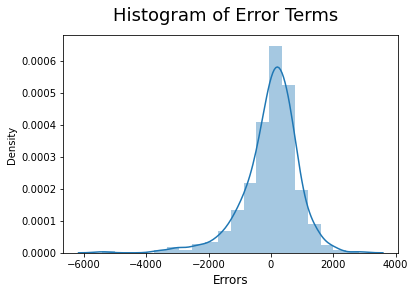

In [63]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins=20)
fig.suptitle('Histogram of Error Terms', fontsize = 18)
plt.xlabel('Errors', fontsize =12)

##### Above plot shows that the assumption of error terms being normally distributed with mean zero is satisfied.

Text(0, 0.5, 'Error')

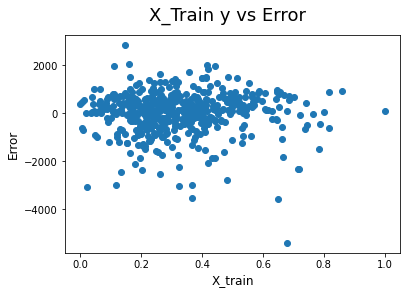

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(X_train['windspeed'],(y_train - y_train_cnt))    # Using one of the independent variable for plotting
fig.suptitle('X_Train vs Error', fontsize=18)              # Plot heading 
plt.xlabel('X_train', fontsize=12)                          # X-label
plt.ylabel('Error', fontsize=12)                            # y-label

##### from the above plot, we can say that the assumption of error terms to be independent of each other is satisfied.

### Making Predictions

In [65]:
# applying scaling on the test set
num_vars = ['temp', 'hum', 'windspeed']
bike_test[num_vars]=scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Weds
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [66]:
# Dividing test data set to X and y set
y_test = bike_test.pop('cnt')
X_test = bike_test

#### Using the above model to make predictions

In [67]:
# Creating X_test_new dataframe by variable from X_test
X_test_new = X_test[X_train_new.columns]

# Adding constant variable
X_test_sm = sm.add_constant(X_test_new)

In [68]:
# Making Predictions
y_test_pred = lm.predict(X_test_sm)

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

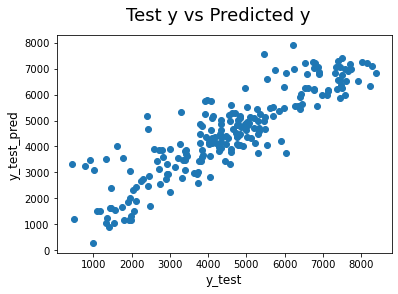

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Test y vs Predicted y', fontsize=18)              # Plot heading 
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_test_pred', fontsize=12)   

##### the above plot shows predicted target value to the test target value.

In [70]:
# Evaluate r2_score
print(round(r2_score(y_test, y_test_pred),2))

0.78


##### So we can see that Rsquared = 79% for train set and around 78% on test set. Hence, the model has learned on the train set , it is able to generalise it on the test set as well.

##### The equation of our best fitted line is 
        cnt = 1272.50 + 4389.16*temp - 1560.54*windspeed - 602.31*weathersit_mist - 512.50*season_spring + 2080.91*yr 
              + 432.13*season_summer + 650.76*season_winter  + 560.93*mnth_Sep + 405.02*workingday + 506.21*weekday_Mon + 
              -452.99* mnth_July

''' Following points can be inferred from the equation of best fitted line:-

•	Temperature has the highest impact on demand for shared bikes as its coeffiecient is the highest absolute value. Hence, a 
    unit change in temperature will increase the demand by more than 4000 counts.
    
•	Windspeed has negative coefficient which indicates that the windspeed has negative impact on demand for shared bikes.Hence, 
    unit change in windspeed reduces the demand by more than 1500 counts.
    
•	Year has the positive influence on the demand of shared bikes. Hence, we can say that demand for bikes sharing will 
    increase in coming years. Hence, a unit change in year will increase the demand by more than 2000.
    
•	Month of September shows improved demand for shared bikes. Whereas, month of July shows reduction in demand for shared 
    bikes.
    
•	It can be inferred that Monday there is an increase in demand for shared bikes.

•	Working day shows increase in demand for shared bikes than in holidays or weekend.

•	There is severe reduction on demand for shared bikes in spring season and improvement in demand during summer and winter 
    season.
'''